### What is factor analysis?

Factor analysis is an exploratory data analysis method that is used to search and identify underlying factors or imporant variables or dimensions from a set of observed data. It extracts the most common variance, the variables that impact the behaviour of the data set the most, and returns them. Factor analysis is used quite widely in drug discovery, information technology and other such modern fields. It serves to understand multi variate datasets better and the filter out unnecessary variables. In contrast to other dimensionality reduction methods, it is designed to explain the correlations between variables.

### What are the relationships between covariance matrix, factor analysis, and principal component analysis (PCA)?

PCA uses the covariance matrix to explain the maximum amount of variance while factor analysis uses a scaled derivative of the covariance matrix to explain the correlation between underlying variables. In PCA, the resulting components cannot really be interpreted, but in FA, they can be (to a certain extent - correlation does not equal causation).

### What do we mean with loadings?

Factor loadings are part of the outcome of an FA. This makes up a matrix that shows the relationship of each variable to the underlying factor. The correlation coefficient can be observed for the variable and the factor. Loadings attempt to explain in a deeper fashion the relationship between variables to each other.

### Why factors are orthogonal to each other? What’s the consequence?

Orthogonal factors would mean that there is no correlation between the 2 vectors/variables. This is useful in PCA, as orthogonal factors are the ones with maximum variance. Orthogonality is not as much of an issue in FA, however.
### Why factor analysis can be used as a generative model?

As factor analysis does not assume anything, except for the fact that there are underlying factors, this can be looked at as a generative model. Discriminative models, on the other hand, make their predictions based on some underlying conditional probability and is used for classification. Generative models, such as PCA or FA, focus on the distribution of the dataset to return the factors that are most central.

### What is the relationship between factor analysis and autoencoder?

Factor analysis reduces the dataset/projects the dataset to a low-dimensional hyperplane, for example, in 2D space. Autoencoder can learn to project to a curve in 2D space that linear factor analysis methods cannot achieve. Autoencoders, in machine learning jargon, are just multi-layer perceptrons. This can be more complicated than linear models, like FA or PCA, but can yield better results depending on the type of dataset.

### How would you explain factor analysis to yourself half year ago?

I would have said that factor analysis in simple terms returns us the correlation coefficients between each set of variables in the dataset.



In [11]:
from factor_analyzer import FactorAnalyzer
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("test.csv")
df.drop(['Arrival Delay in Minutes'], axis=1, inplace=True)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,3,5,5,5,5,2,5,5,50,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,5,4,4,4,4,3,4,5,0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,2,4,1,3,2,2,2,0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,4,1,1,1,1,3,1,4,0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,2,4,2,4,0,satisfied


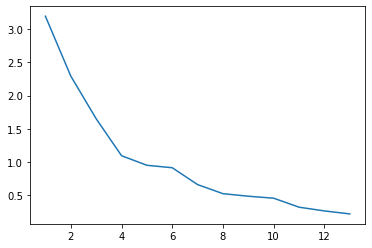

array([3.19792969, 2.2949087 , 1.65156684, 1.09349262, 0.94874304,
       0.91159054, 0.65718497, 0.52022402, 0.48176178, 0.4518201 ,
       0.31622202, 0.25984414, 0.21471154])

In [21]:
data = df[df.columns[7:20]]

fa = FactorAnalyzer()
fa.fit(data, 10)

eigenv, v = fa.get_eigenvalues()
r = range(1, data.shape[1]+1)
plt.plot(r, eigenv)
plt.show()

eigenv

Loads of the eigenvalues here are below 1,so just drop those, as they won't have a ton of impact.

In [34]:
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(data)
loadings = fa.loadings_
print(loadings)

[[ 0.03257881  0.14966616  0.14077853]
 [ 0.75066824  0.18898721  0.1359514 ]
 [ 0.52086128 -0.04871595  0.04449852]
 [ 0.91638205  0.05996598  0.03923825]
 [ 0.52676698 -0.03599489 -0.04578428]
 [-0.02150908  0.74136468  0.00600339]
 [ 0.3522664   0.41456313  0.14660588]
 [-0.00130197  0.80825271  0.08787644]
 [-0.01275996  0.73189982  0.44968556]
 [ 0.01260924  0.08302829  0.73024274]
 [ 0.07311662  0.07553057  0.51371145]
 [ 0.01900767  0.02856152  0.73125865]
 [ 0.01472628  0.119363    0.29566238]]


The higher the value of the loading, the more important that variable is for the selected factor. By some googling, it seems that a loading cutoff of 0.5 is the norm. As per the previous, the values 2,3,4,5 of the first variable are the best correlated. And further. I'm sure a nice plot could be made for this, but as I am in the middle of exam season, I will leave it at this. We have the loading matrix and we would only have to extract the value above .5 and get the factors.

Thanks! 